Чтобы придумать такое распределение, у которого первые четыре момента конечны, а пятый нет, обратимся к определению k-го момента. $\bar{x^k} = \frac{1}{n}\int\limits_{-\infty}^{+\infty}p(x)x^kdx$ (1), где p(x) - плотность распределения. Вспомним из курса матанализа, что интеграл $\int\limits_{-\infty}^{+\infty}\frac{1}{x}dx$ расходится. Тогда возьмём за плотность $p(x) = \frac{C}{x^6}I(x \ge 1)$, где C - некоторая константа, а $I(x \ge 1)$ обеспечит нам сходимость в нуле первых четырех моментов. Действительно, если подставим p(x) в (1), то получим расходящийся интеграл. Константу C будем искать из нормировки $\int\limits_{-\infty}^{+\infty}p(x)dx = 1$. Посчитав интеграл $\int\limits_{-\infty}^{+\infty}\frac{C}{x^6}I(x \ge 1) = \frac{C}{5}$, получаем, что С = 5. Таким образом, наше распределение имеет плотность $p(x) = \frac{5}{x^6}I(x \ge 1)$. 

Следующим шагом подключаем нужные библиотеки и создаем выборку из нашего собственного распределения.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

n = 10000

class my_gen(sps.rv_continuous):  # создание собственного распределения с плотностью p(x)
    def _pdf(self, x):
        return 5 * x ** (-6) 
mine = my_gen(a=1, b=np.inf, name='mine')

sample = mine.rvs(size=n)  # генерация выборки размера n

Далее строим график плотности и наносим точки выборки на график (с нулевой y - координатой).

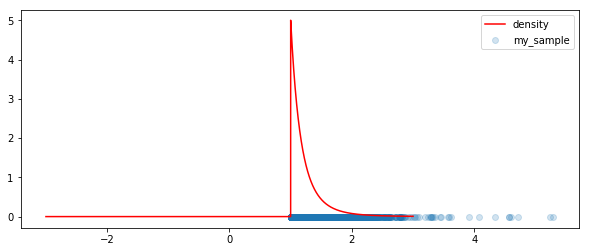

In [7]:
points_for_my_sample = np.linspace(-3, 3, n)  # задаем сетку для построения графика плотности

plt.figure(figsize=(10, 4))
plt.scatter(sample, np.zeros(n) - 0.02, alpha=0.2, label='my_sample')  # label - описание в легенде
plt.plot(points_for_my_sample, mine.pdf(points_for_my_sample), color='red', label='density')  # color - цвет графика
plt.legend()
plt.show()

Теперь посчитаем истинное значение дисперсии. Сначала для этого считаем математическое ожидание как $EX = \int\limits_1^{\infty} xp(x)dx = \int\limits_1^{\infty}\frac{5}{x^5}dx$. Далее с лёгкостью считаем $DX = \int\limits_1^{\infty} p(x)(x - EX)^2dx = \int\limits_1^{\infty}\frac{5}{x^6}(x - EX)^2dx$. 

In [8]:
# Импортируем нужные для интегрирования библиотеки
from scipy.integrate import quad, odeint
from scipy.special import erf

# Задаём функцию для интегрирования и подсчёта математического ожидания
def g(x):
    return 5 * x ** (-5)

first_res, first_err = quad(g, 1, np.inf)  # Подсчёт интеграла (first_err - оценка ошибки)
e = first_res  # В переменной e находится посчитанное значение математического ожидания

# Задаём функцию для интегрирования и подсчёта дисперсии
def f(x):
    return 5 * x ** (-6) * ((x - e) ** 2)

second_res, second_err = quad(f, 1, np.inf)  # Подсчёт интеграла (second_err - оценка ошибки)
d = second_res  # В переменной d находится посчитанное значение дисперсии

Теперь строим график зависимости модуля разности оценки дисперсии и её истинного значения от n.

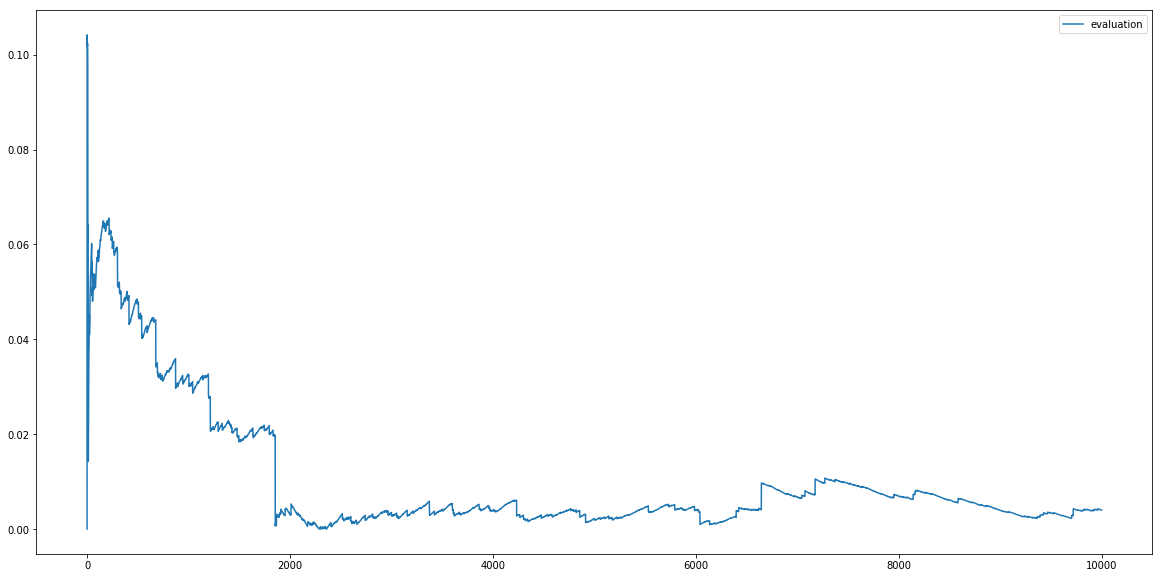

In [9]:
n = 10000

sample = mine.rvs(size=n)
arr = np.arange(0, n, 1)
evaluation = np.zeros(n)
for i in range(1, n):
    evaluation[i] = abs(np.mean(sample[:i] ** 2) - np.mean(sample[:i]) ** 2 - d)

plt.figure(figsize=(20, 10))
plt.plot(arr, evaluation, label='evaluation')
plt.legend()
plt.show()

Проводим аналогичные исследования для выборки из распределения Коши.

In [10]:
cauchy_sample = sps.cauchy.rvs(size = n)  # Генерация выборки

Далее строим график плотности распределения Коши.

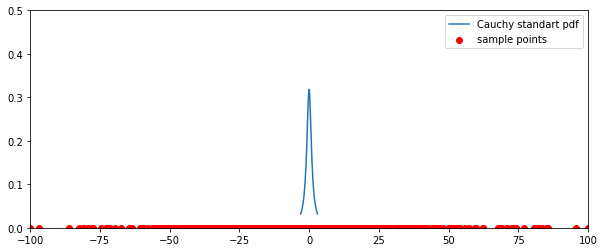

In [16]:
points_for_cauchy_sample = np.linspace(-3, 3, n)
plt.figure(figsize=(10, 4))
plt.plot(points_for_cauchy_sample, sps.cauchy.pdf(points_for_cauchy_sample), label = 'Cauchy standart pdf')
plt.scatter(cauchy_sample, n * [0], color = 'red', label = 'sample points')
plt.ylim(0, 0.5)
plt.xlim(-100, 100)
plt.legend()
plt.show()

Теперь строим график оценки дисперсии.

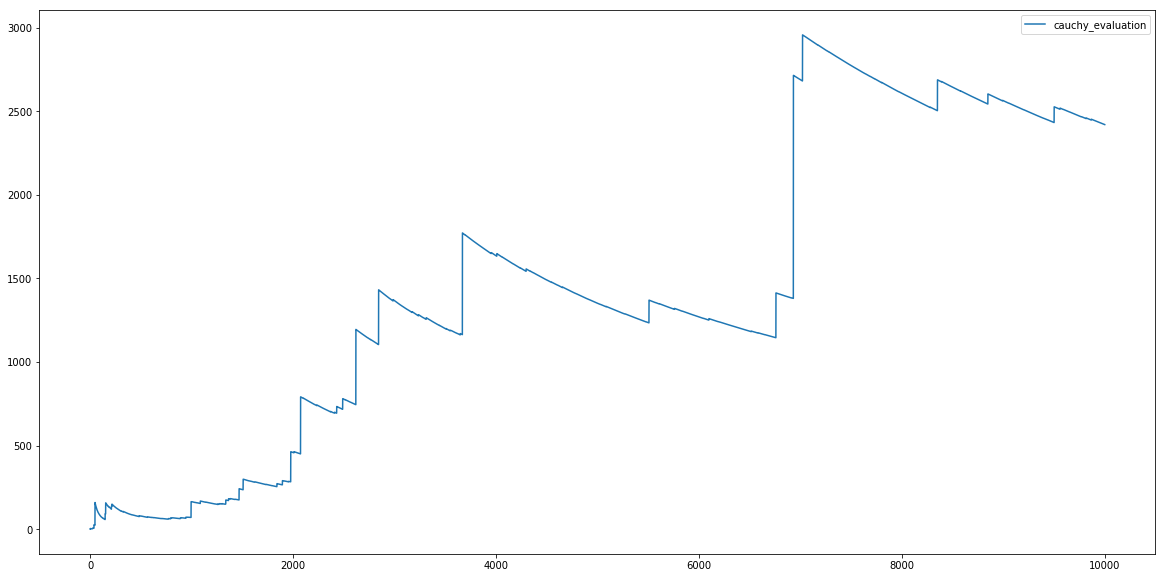

In [17]:
arr = np.arange(0, n, 1)
cauchy_evaluation = np.zeros(n)
for i in range(1, n):
    cauchy_evaluation[i] = np.mean(cauchy_sample[:i] ** 2) - np.mean(cauchy_sample[:i]) ** 2 

plt.figure(figsize=(20, 10))
plt.plot(arr, cauchy_evaluation, label='cauchy_evaluation')
plt.legend()
plt.show()

Такое поведение графика характеризуется тем, что у распределения Коши отсутствует дисперсия.